# Hi Linkedin Community 

# Object Detection using Image url

### 1. Input the Copied url here

In [21]:
image_url = input("Enter the image URL: ")

Enter the image URL: https://previews.123rf.com/images/bigtunaonline/bigtunaonline1710/bigtunaonline171000243/88655949-blurred-background-with-modern-luxury-car-on-the-blur-roof-of-the-building-at-the-sunset-modern-car.jpg


### 2. Run the code

Image saved as custom_image.jpg


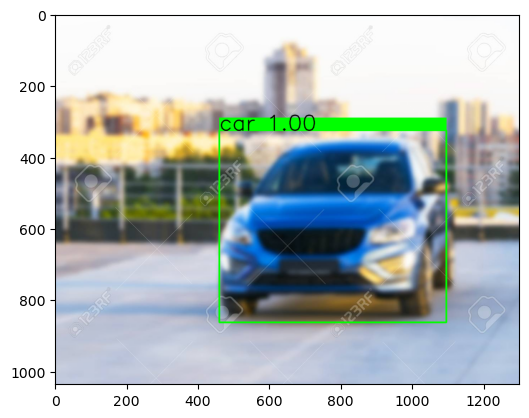

In [22]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO
import requests

# Load YOLO
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')
classes = []

with open('coco.names', 'r') as f:
    classes = f.read().strip().split('\n')

layer_names = net.getUnconnectedOutLayersNames()

# Function to download image from URL
def download_image(image_url, save_path):
    response = requests.get(image_url)
    if response.status_code == 200:
        with open(save_path, 'wb') as f:
            f.write(response.content)
        return True
    else:
        print(f"Failed to download image from URL. Status code: {response.status_code}")
        return False

# Get the image URL from user input


# Check if the image URL is valid
if image_url:
    # Download image from URL and save it to the current working directory
    image_filename = "custom_image.jpg"
    save_path = image_filename

    if download_image(image_url, save_path):
        print(f"Image saved as {image_filename}")

        # Read and display the downloaded image
        img = cv2.imread(save_path)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

        # Preprocess the image
        height, width, channels = img.shape
        blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
        net.setInput(blob)
        outs = net.forward(layer_names)

        class_ids = []
        confidences = []
        boxes = []

        # Process the output
        for out in outs:
            for detection in out:
                scores = detection[5:]
                class_id = np.argmax(scores)
                confidence = scores[class_id]
                if confidence > 0.5:  # You can adjust the confidence threshold as needed
                    center_x = int(detection[0] * width)
                    center_y = int(detection[1] * height)
                    w = int(detection[2] * width)
                    h = int(detection[3] * height)

                    x = int(center_x - w / 2)
                    y = int(center_y - h / 2)

                    class_ids.append(class_id)
                    confidences.append(float(confidence))
                    boxes.append([x, y, w, h])

        # Draw bounding boxes and labels with highlighted background
        indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
        font_size = 2  # Set the font size

        for i in range(len(boxes)):
            if i in indexes:
                x, y, w, h = boxes[i]
                label = str(classes[class_ids[i]])
                confidence = confidences[i]
                color = (0, 255, 0)

                # Draw bounding box frame with increased width
                cv2.rectangle(img, (x, y), (x + w, y + h), color, 3)  # Increase the thickness to 3

                # Draw a filled rectangle as a background for the label
                cv2.rectangle(img, (x, y - 35), (x + w, y), color, -1)

                # Use cv2.putText to set font size and make it bold
                cv2.putText(img, f'{label} {confidence:.2f}', (x, y), cv2.FONT_HERSHEY_SIMPLEX, font_size, (0, 0, 0), 2, cv2.LINE_AA)

        # Display the result
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()
    else:
        print("Failed to download and save the image.")
else:
    print("Please provide a valid image URL.")

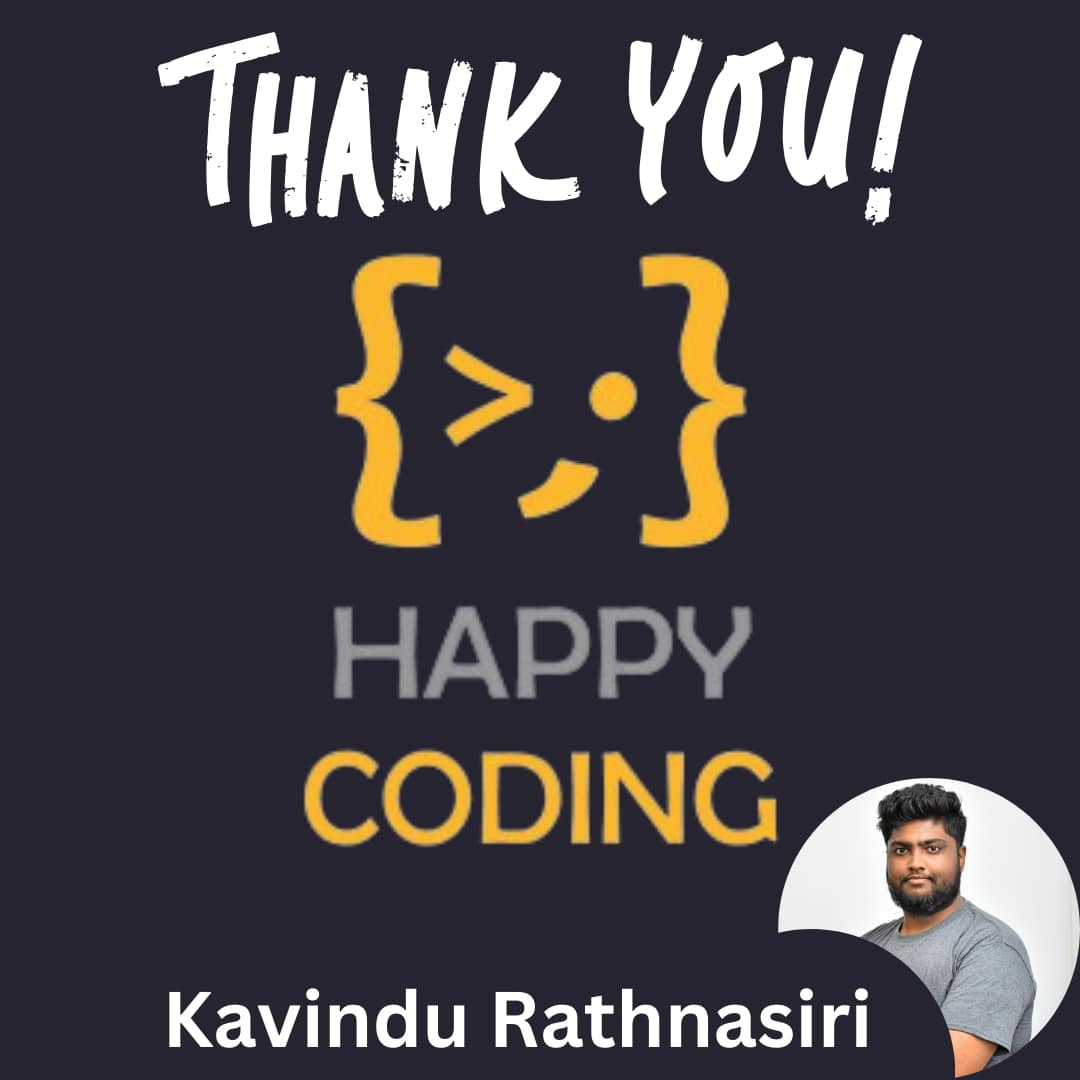

In [23]:
from IPython.display import Image

image_path = 'C:\Object Detection\Try 4\TY.jpg'


Image(filename=image_path, width = 550)
